# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

## 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

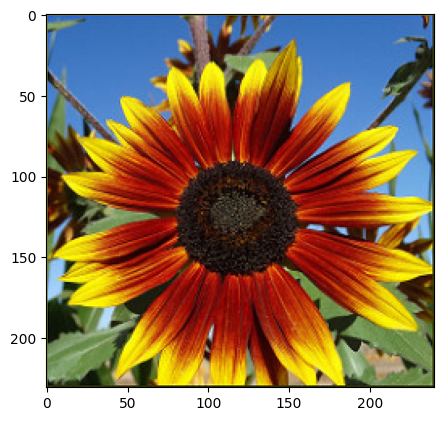

In [5]:
plt.figure(figsize=[5, 5])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

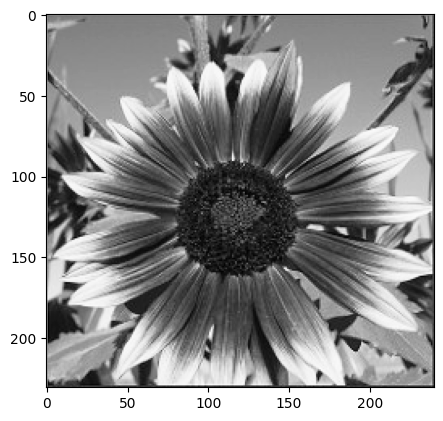

In [7]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [8]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

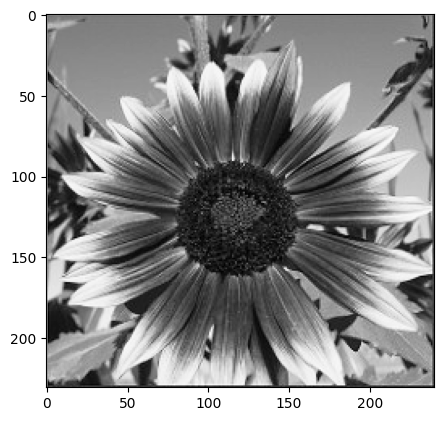

In [9]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [10]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [11]:
def convert_rgb_to_grayscale(img_rgb):
     return np.array(np.rint(img_rgb[:,:,0] *  0.29901 + img_rgb[:,:,1] * 0.58701 + img_rgb[:,:,2] * 0.1140), np.uint8)

In [12]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:** Из-за того, что человеческий глаз по разному воспринимает цвета

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB $\to$ HSV

In [13]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

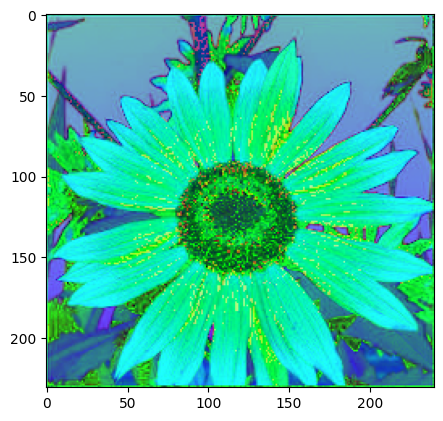

In [14]:
plt.figure(figsize=[5, 5])
plt.imshow(img_hsv)

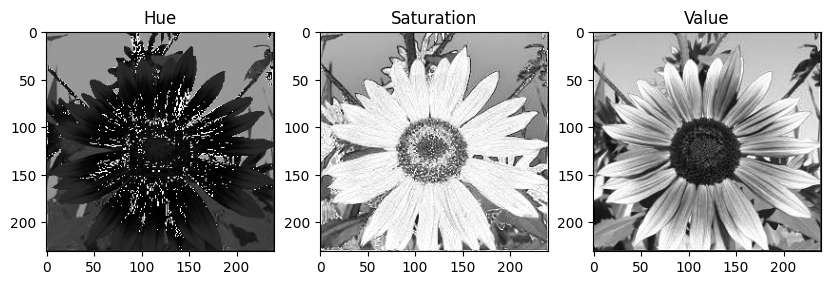

In [15]:
# Split the image into color channels
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()


## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

In [16]:
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

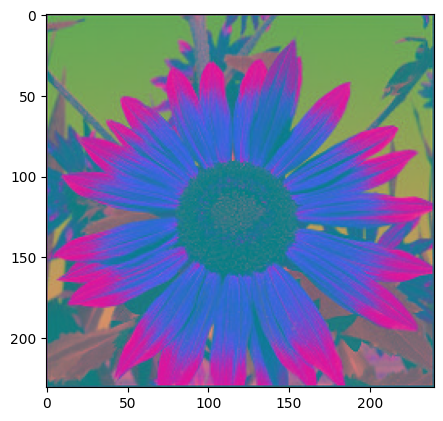

In [17]:
plt.figure(figsize=[5, 5])
plt.imshow(img_yuv)

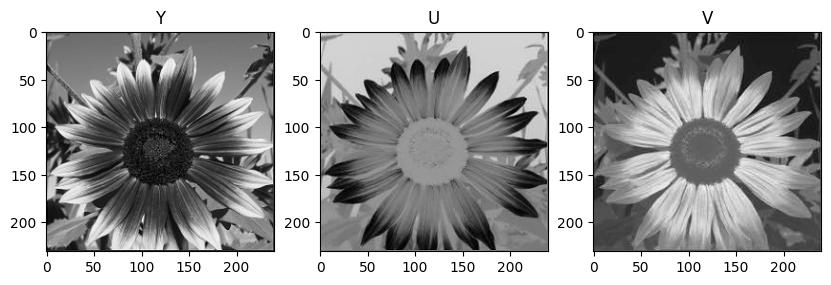

In [18]:
# Split the image into color channels
y, u, v = cv2.split(img_yuv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(y, cmap="gray")
plt.title('Y')

plt.subplot(132)
plt.imshow(u, cmap="gray")
plt.title('U')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('V')

# Display the plot
plt.show()


## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** Например если надо выделить объект явно выделяющийся на фоне, то можно перейти в HSV

## Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [19]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [20]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [21]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

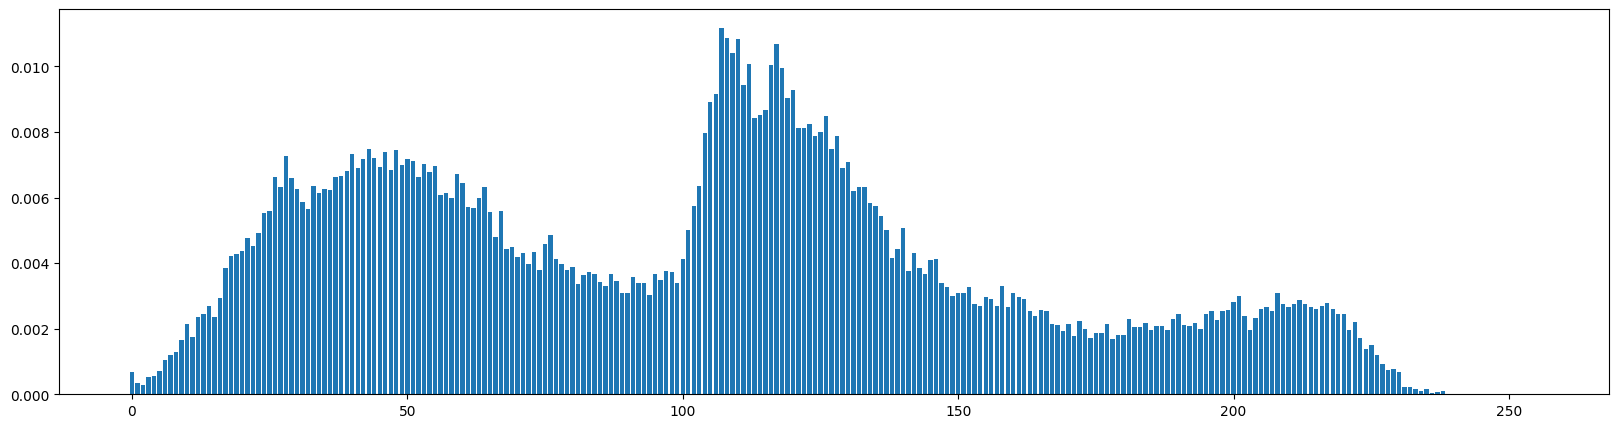

In [22]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [54]:
def compute_hist(img):
    hist = np.histogram(img.ravel(), bins=np.arange(257))
    return hist[0]

In [55]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

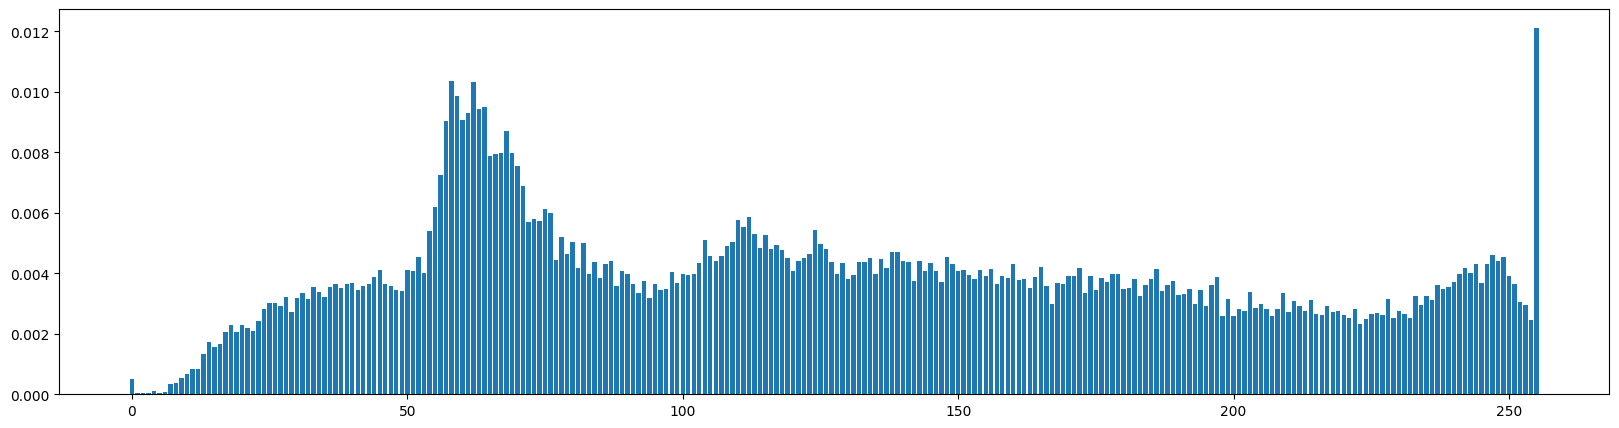

In [56]:
visualize_hist(hist_r)

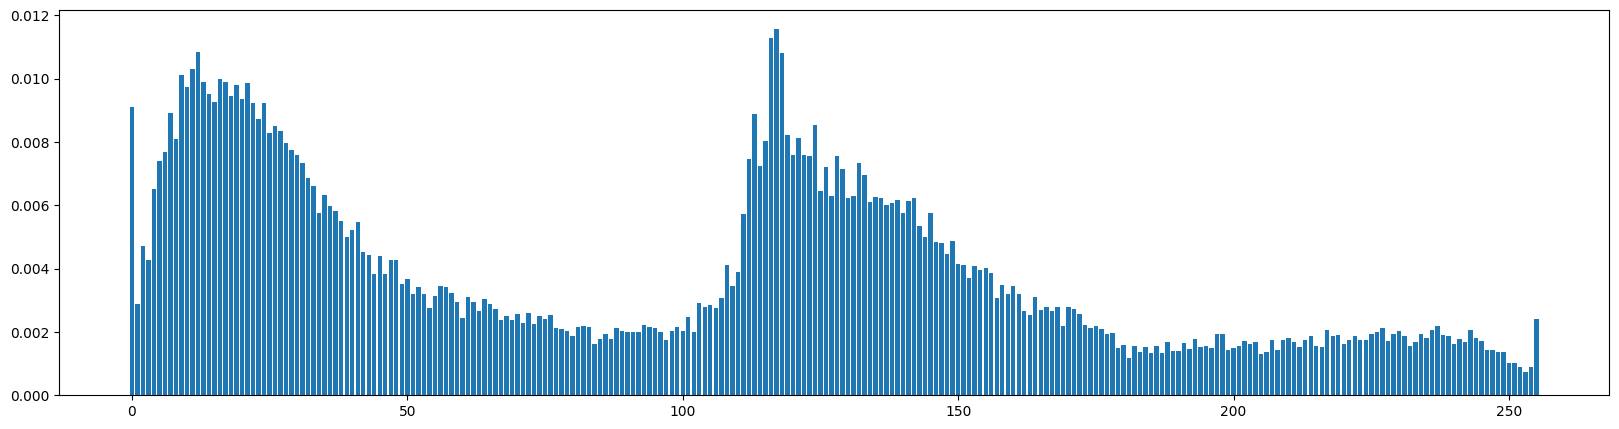

In [57]:
visualize_hist(hist_g)

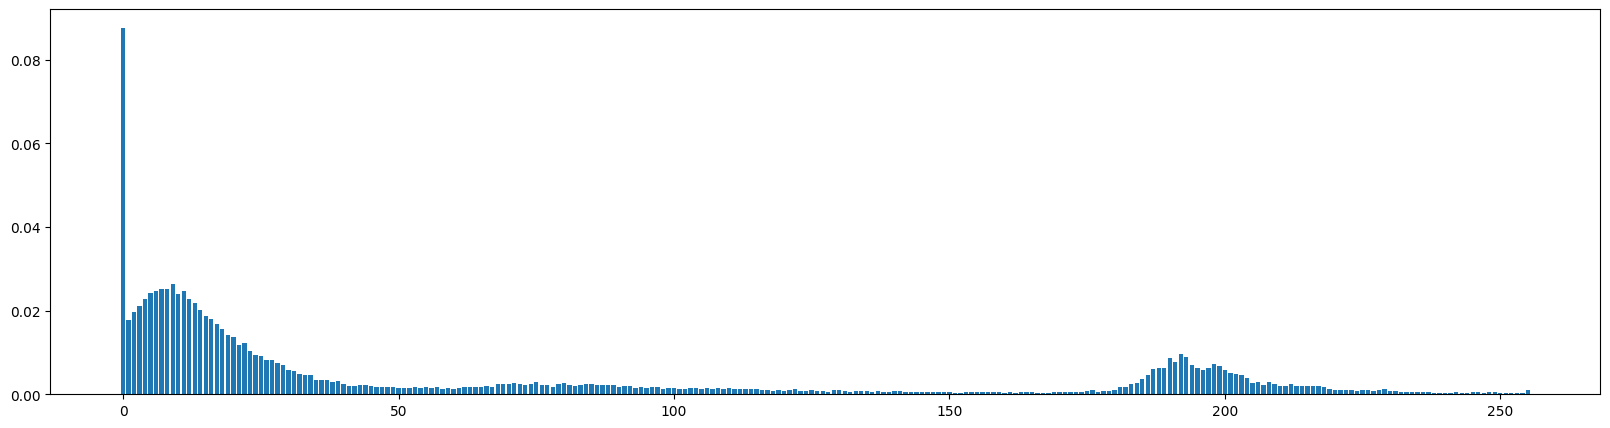

In [58]:
visualize_hist(hist_b)

In [51]:
assert((hist_gray == hist_cv).all())

## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:** По гистограмме можно определить общий вид изображения, а также получить информацию о его контрасте, яркости и насыщенности.

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:** Если в кадре ничего не меняется, то и гистограмма не будет меняться. Если в кадр добавляются новые объекты, то их яркость и цвет будут добавляться к гистограмме. Если объекты двигаются, то их гистограмма будет “бегать” по гистограмме кадра. Если освещенность изменяется, то гистограмма будет сжиматься или расширяться.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

In [59]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 90]
result, encimg = cv2.imencode('.jpg', img_gray, encode_param)

In [60]:
hist_cv = cv2.calcHist([encimg],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

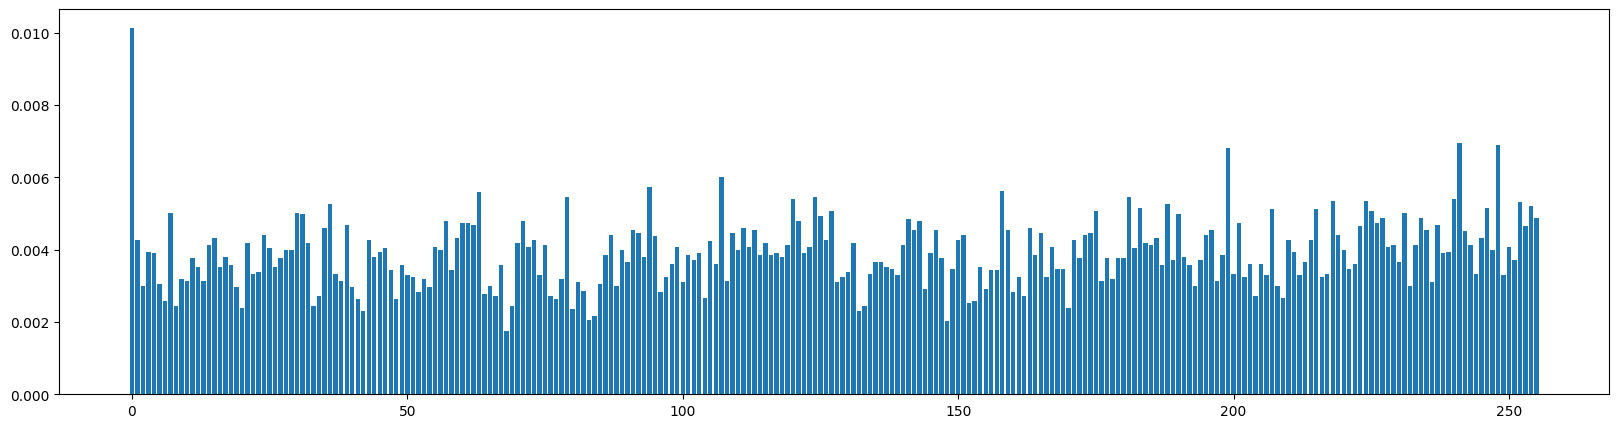

In [61]:
visualize_hist(hist_cv)

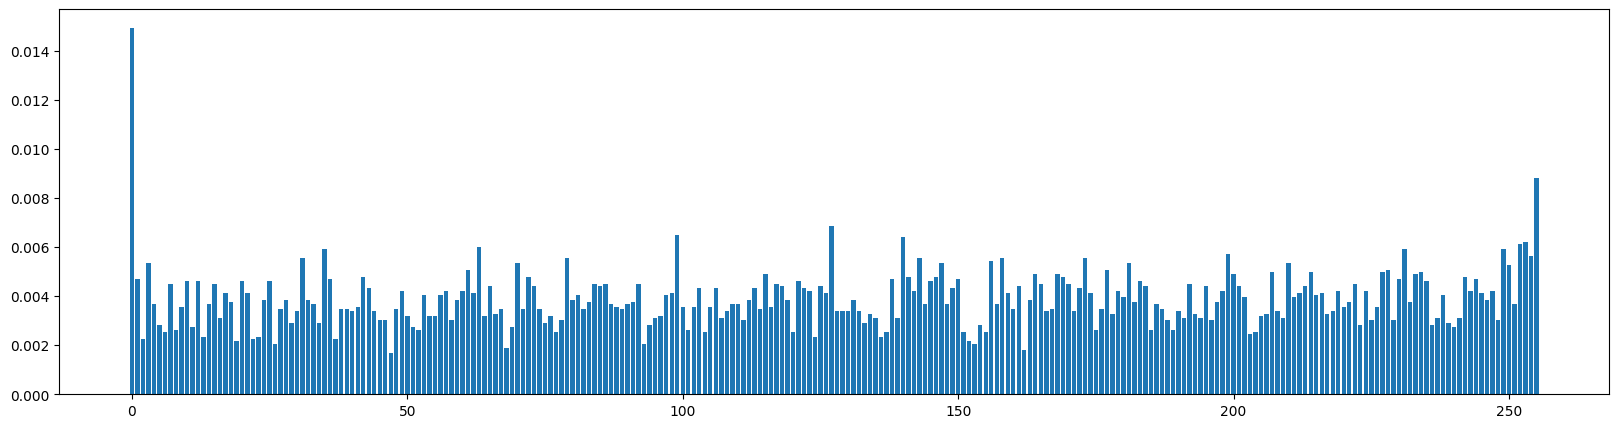

In [62]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 60]
result, encimg = cv2.imencode('.jpg', img_gray, encode_param)
hist_cv = cv2.calcHist([encimg],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений
visualize_hist(hist_cv)

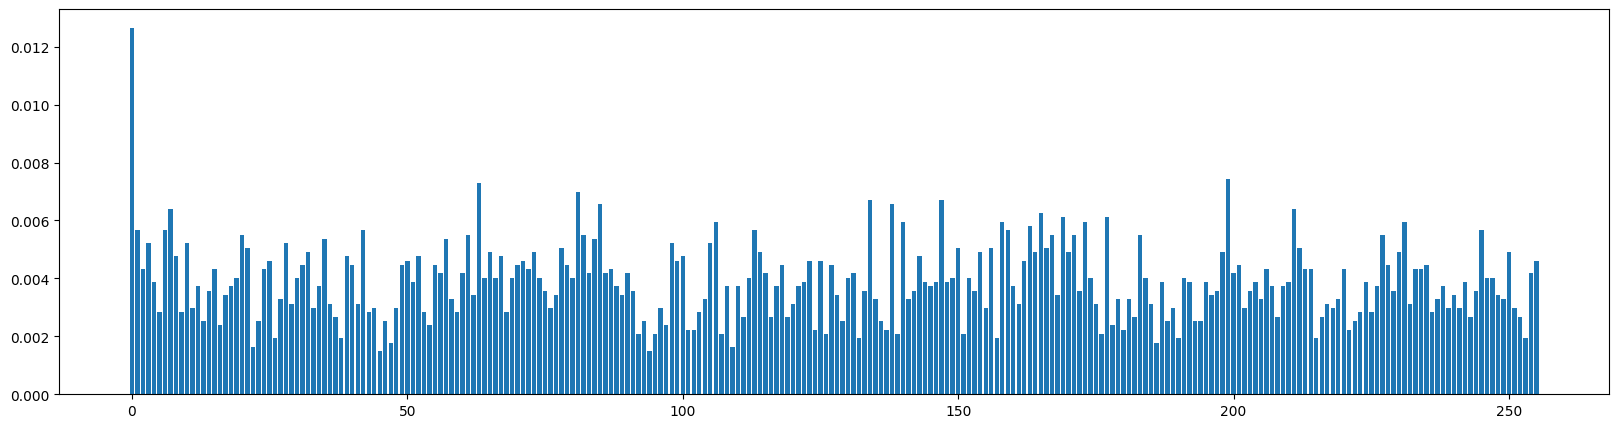

In [63]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 30]
result, encimg = cv2.imencode('.jpg', img_gray, encode_param)
hist_cv = cv2.calcHist([encimg],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений
visualize_hist(hist_cv)

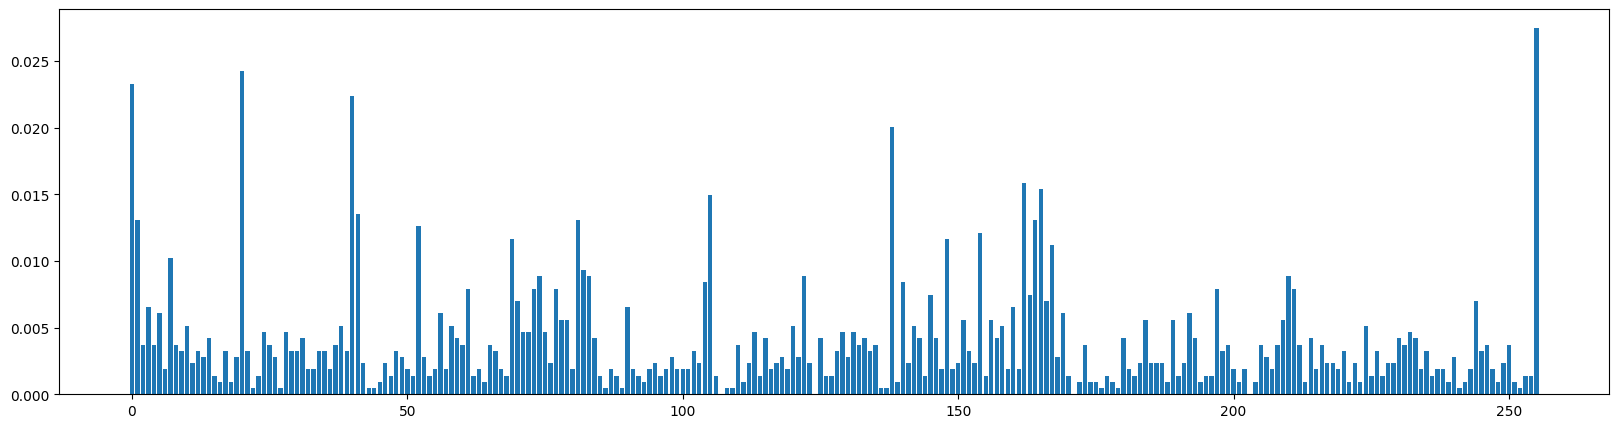

In [65]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 5]
result, encimg = cv2.imencode('.jpg', img_gray, encode_param)
hist_cv = cv2.calcHist([encimg],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений
visualize_hist(hist_cv)

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

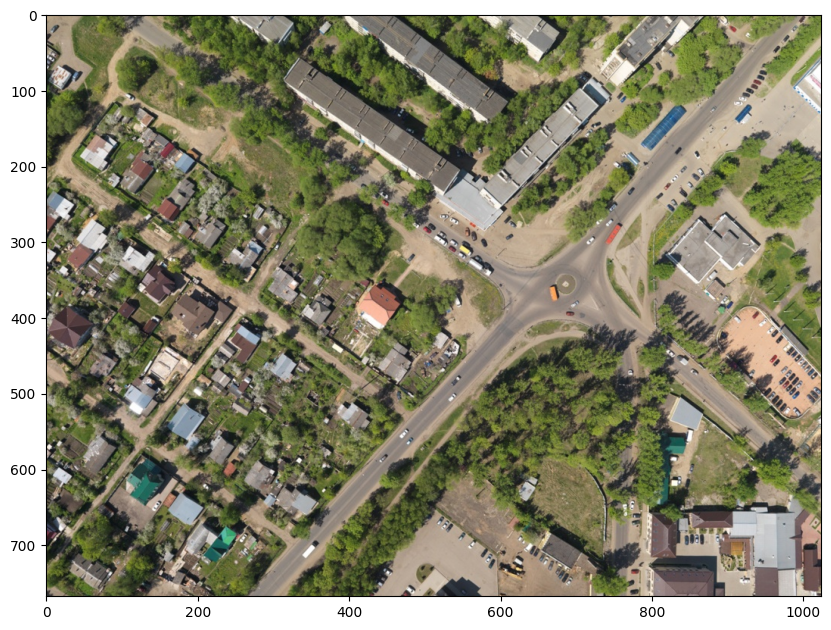

In [68]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image)

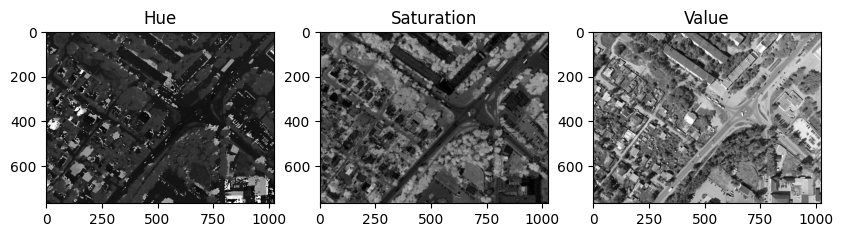

In [69]:
aerial_image_hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(aerial_image_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()

In [70]:
hist_cv = cv2.calcHist([h],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значени

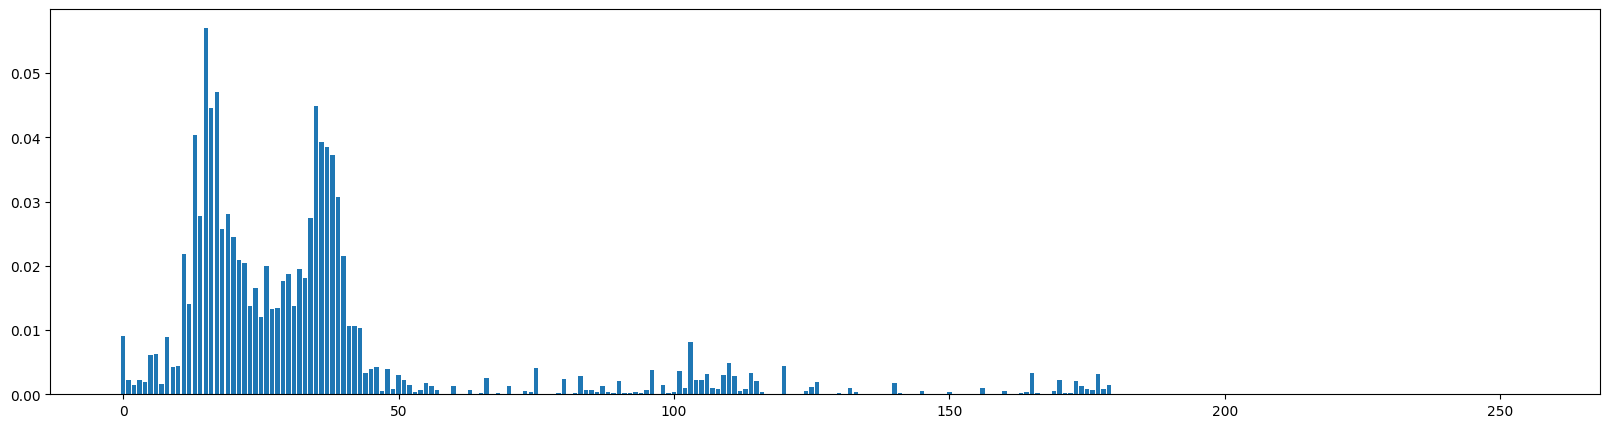

In [71]:
visualize_hist(hist_cv)

Так как состовляющая $H$ - соответствует цветовому фону и по построенной гистограмме видно, что самый популярные оттенки находятся в пределах от 0 до 25 и от 25 до 50. Предел от 0 до 25 относится с "серым" оттенкам (крыши, дороги), а вот от 25 до 50 уже относится к "зеленым" оттенкам, которые и хотим выделять.

In [122]:
lower_hue = np.array([25,0,0]) 
upper_hue = np.array([50,255,255])
mask      = cv2.inRange(aerial_image_hsv, lower_hue, upper_hue)

In [123]:
color=(0,255,0)
color = color[::-1]
colored_mask = np.expand_dims(mask, 0).repeat(3, axis=0)
colored_mask = np.moveaxis(colored_mask, 0, -1)
masked = np.ma.MaskedArray(aerial_image, mask=colored_mask, fill_value=color)
image_overlay = masked.filled()
image_combined = cv2.addWeighted(aerial_image, 0.5, image_overlay, 0.5, 0)

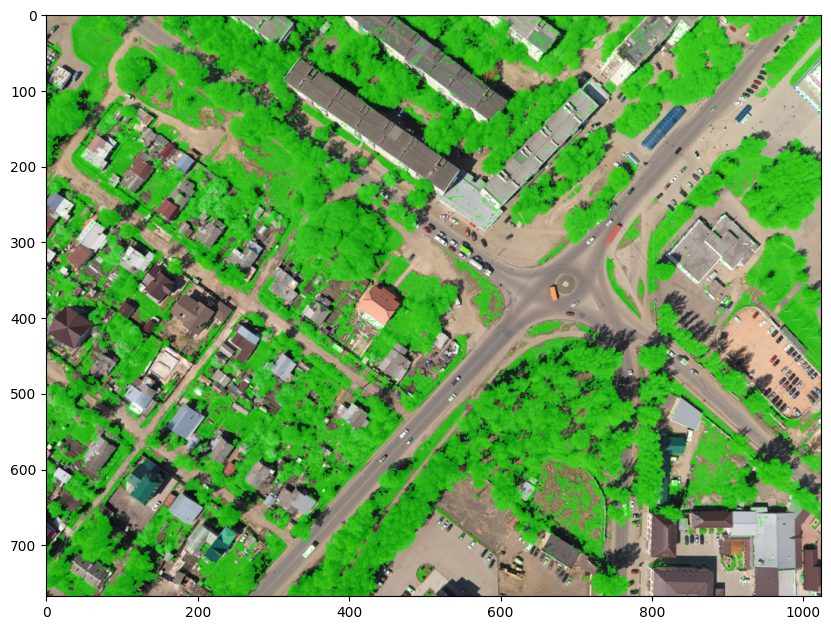

In [124]:
plt.figure(figsize=[10, 10])
plt.imshow(image_combined)

plt.show()

# Упражнение 6: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

Вычислим интегральное изображение по формуле: $ S(x,y) = I(x, y) + S(x-1, y) + S(x, y-1) – S(x-1, y-1) $, где $ S $ - результат предыдущих итераций для данной позиции пикселя, $I$ – значение пикслеля исходного изображения. 

In [125]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img

        width = img.shape[0]
        height = img.shape[1]
        self.table = np.zeros((width, height))
        for x in range(width):
            for y in range(height):
                self.table[x, y] = img[x, y] + self.check(x - 1, y) + self.check(x, y - 1) - self.check(x - 1, y - 1)
                    
    def check(self, x,y):
        if x < 0 or y < 0 or x >= self.table.shape[0] or y >= self.table.shape[1]:
            return 0
        else:
            return self.table[x, y]
            
    def sum(self, x, y, w, h):
        y += h - 1
        x += w - 1
        return self.check(x, y) - self.check(x, y - h) - self.check(x - w, y) + self.check(x - w, y - h)


In [126]:
I = IntegralImage(img_gray)

In [127]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** Детекция и распознование образов

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** Динамическое программирование